In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 3

## Creamos una clase que permita simular llamadas a un Web Service

In [2]:
class WebServiceSim:
    
    def simularDosDB(self, n, media_llamadas, media_demora_db1, media_demora_db2, p_db1):
        if p_db1 > 1:
            raise Exception('La probabilidad p debe ser menor o igual a 1')
            
        return self._simularLlamadas(n, media_llamadas, media_demora_db1, media_demora_db2, p_db1)
    
    def simularUnaDB(self, n, media_llamadas, media_demora_db):
        return self._simularLlamadas(n, media_llamadas, media_demora_db)
    
    def _simularLlamadas(self, n, media_llamadas, media_atencion_db1, media_atencion_db2 = None, p_db1 = 1):
        '''
        Simula llamadas a servidores que serán atendidas por una o dos bases de datos.
        Si no se indica el parametro "media_atencion_db2" se usa una sola base de datos.
        Si se indica el parametro, se puede indicar la probabilidad "p" que determina la 
            probabilidad de que una llamada sea atendida por la base de datos 1. Y "1-p"
            será la probabilidad de que sea atendida por la base de datos 2.
        '''
        t_actual = 0
        llamadas_sin_esperar = 0
        t_demora_solicitud = 0
        t_demoras_solicitudes = []

        llamadas = np.random.exponential(media_llamadas, n).cumsum()

        for t_llamada in llamadas:
            
            # Hay 2 bases de datos para elegir
            if p_db1 != 1:
                t_procesarLlamada = self._calcularProcesarConDosDB(media_atencion_db1, media_atencion_db2, p_db1)
            
            # Hay una sola base de datos
            else:
                t_procesarLlamada = np.random.exponential(media_atencion_db1)
            
            # Cuanto espera para hacer la llamada
            t_espera = t_actual - t_llamada
            
            # No espera para hacer la llamada
            if t_espera <= 0:
                t_demora_solicitud = t_procesarLlamada
                t_actual = t_llamada + t_procesarLlamada
                llamadas_sin_esperar += 1
            
            # Tiene espera para hacer la llamada
            else:
                t_demora_solicitud = t_espera + t_procesarLlamada
                t_actual = t_actual + t_procesarLlamada
            
            # Se cuenta la demora total de la solicitud
            t_demoras_solicitudes.append(t_demora_solicitud)
        
        
        t_demoras_solicitudes = np.array(t_demoras_solicitudes)
        
        ret = {
            'demora_total_promedio': t_demoras_solicitudes.mean(),
            'sin_esperar_probabilidad': llamadas_sin_esperar / n
        }

        return ret 
    
    def _calcularProcesarConDosDB(self, media_atencion_db1, media_atencion_db2, p_db1):
        u = np.random.random()
        if u < p_db1:
            return np.random.exponential(media_atencion_db1) 
        else:
            return np.random.exponential(media_atencion_db2) 

### Simulamos los dos casos propuestos por el ejercicio

In [3]:
sim = WebServiceSim()
simulacion_alternativa1 = sim.simularDosDB(100_000, 4, 0.7, 1, 0.7)
simulacion_alternativa2 = sim.simularUnaDB(100_000, 4, 0.8)

### Con los resultados graficamos y constrastamos las dos alternativas

Text(0, 0.5, 'Tiempo de demora promedio en segundos')

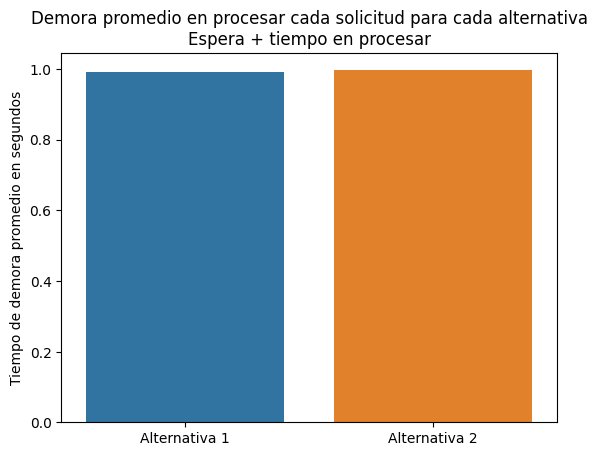

In [4]:
esperas = [
    simulacion_alternativa1['demora_total_promedio'],
    simulacion_alternativa2['demora_total_promedio']
]
grf = sns.barplot(x=['Alternativa 1','Alternativa 2'], y=esperas)
grf.set_title('Demora promedio en procesar cada solicitud para cada alternativa\nEspera + tiempo en procesar')
grf.set_ylabel('Tiempo de demora promedio en segundos')

Text(0, 0.5, 'Proporción de llamadas sobre el total')

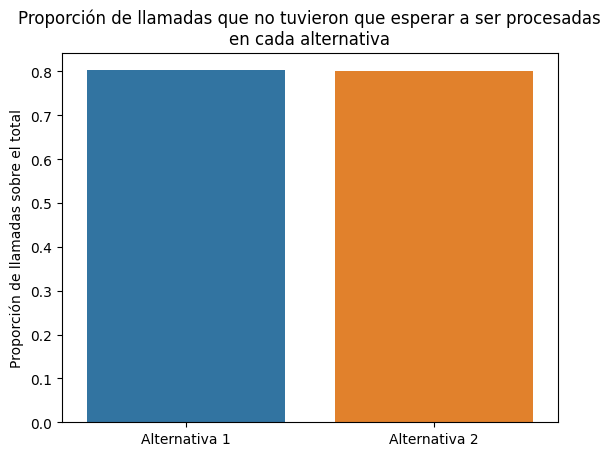

In [5]:
sin_espera = [
    simulacion_alternativa1['sin_esperar_probabilidad'],
    simulacion_alternativa2['sin_esperar_probabilidad']
]
grf = sns.barplot(x=['Alternativa 1','Alternativa 2'], y=sin_espera)
grf.set_title('Proporción de llamadas que no tuvieron que esperar a ser procesadas\nen cada alternativa')
grf.set_ylabel('Proporción de llamadas sobre el total')

Analizando los resultados podemos pensar que las alternativas tienen resultados similares, no notamos que en un caso una sea mucho mejor que otra.

## Realizamos otras simulaciones variando parámetros (uno a la vez)

Para cada variación, los mejores resultados serán aquellos que tengan el menor tiempo de espera promedio y la mayor proporción de llamadas que no esperaron en ser atendidas.

### Para la alternativa 1

#### Variamos p

In [6]:
sim = WebServiceSim()
valores_p = np.linspace(0.01, 0.99, 50)
demoras = []
sin_esperar = []
for p in valores_p:
    res = sim.simularDosDB(20_000, 4, 0.7, 1, p)
    demoras.append(res['demora_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

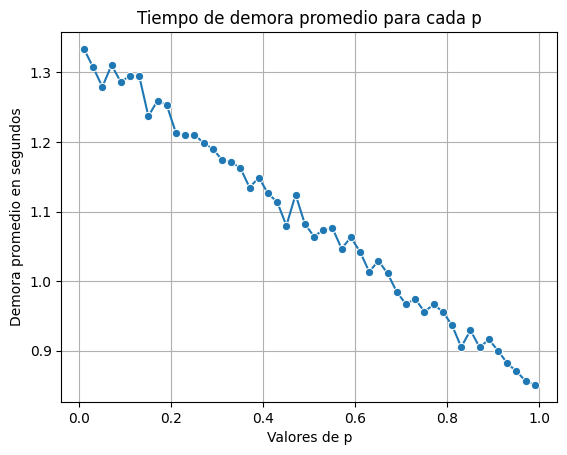

In [7]:
sns.lineplot(x=valores_p, y=demoras, marker='o')
plt.grid()
plt.title('Tiempo de demora promedio para cada p')
plt.ylabel('Demora promedio en segundos')
plt.xlabel('Valores de p')
plt.show()

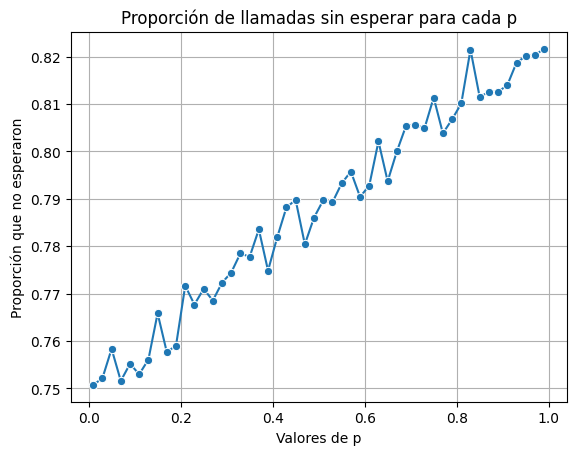

In [8]:
sns.lineplot(x=valores_p, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada p')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de p')
plt.show()

#### Variamos la media de llamadas de la base de datos 2

In [9]:
medias_db2 = np.linspace(0.2, 1, 50)
demoras = []
sin_esperar = []
for mu in medias_db2:
    res = sim.simularDosDB(20_000, 4, 0.7, mu, 0.7)
    demoras.append(res['demora_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

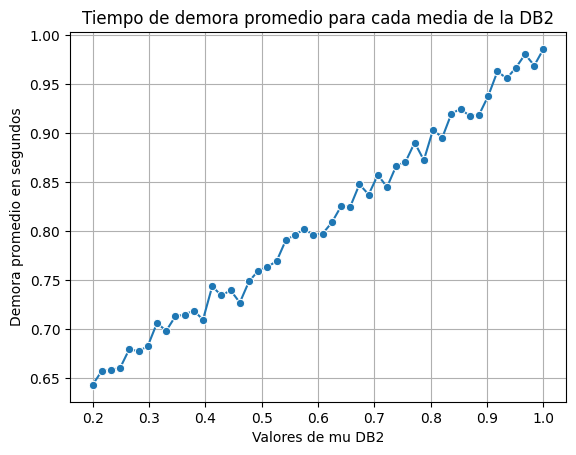

In [10]:
sns.lineplot(x=medias_db2, y=demoras, marker='o')
plt.grid()
plt.title('Tiempo de demora promedio para cada media de la DB2')
plt.ylabel('Demora promedio en segundos')
plt.xlabel('Valores de mu DB2')
plt.show()

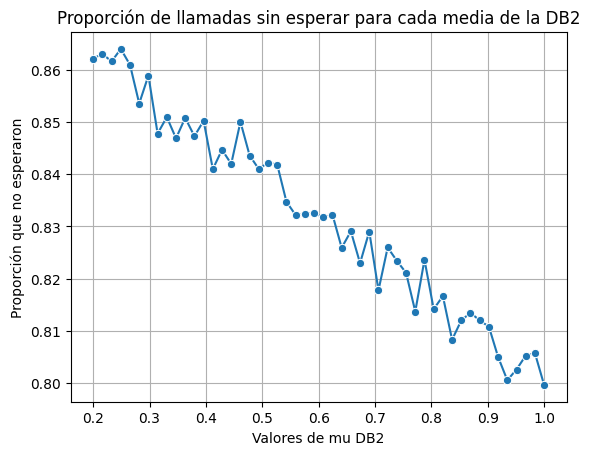

In [11]:
sns.lineplot(x=medias_db2, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de la DB2')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu DB2')
plt.show()

### Para la alternativa 1

#### Variamos la media de llamadas

In [12]:
medias_llamadas = np.linspace(1, 7, 50)
demoras = []
sin_esperar = []
for mu in medias_llamadas:
    res = sim.simularUnaDB(20_000, mu, 0.8)
    demoras.append(res['demora_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

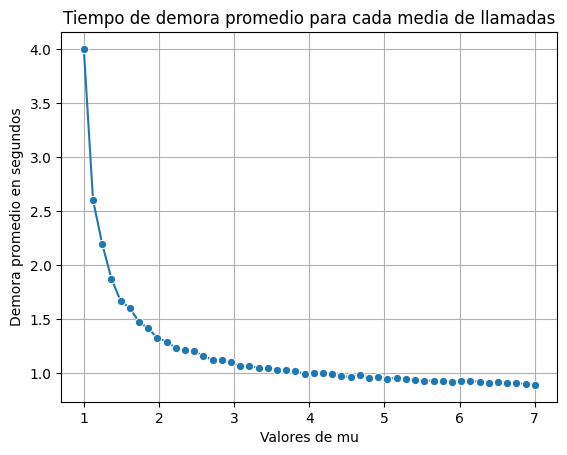

In [13]:
sns.lineplot(x=medias_llamadas, y=demoras, marker='o')
plt.grid()
plt.title('Tiempo de demora promedio para cada media de llamadas')
plt.ylabel('Demora promedio en segundos')
plt.xlabel('Valores de mu')
plt.show()

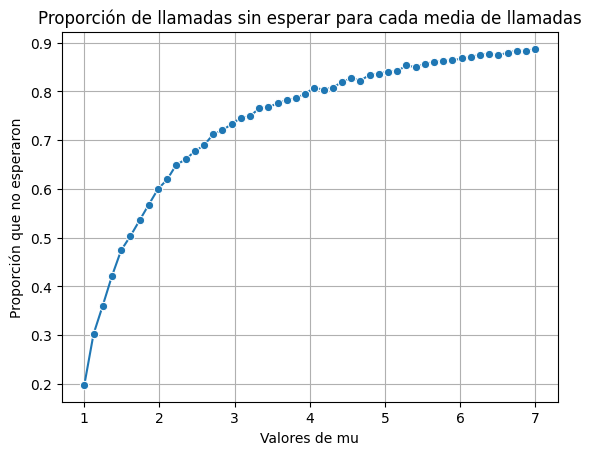

In [14]:
sns.lineplot(x=medias_llamadas, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de llamadas')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu')
plt.show()

#### Variamos la media de atencion de la DB

In [15]:
medias_db = np.linspace(0.5, 4, 50)
demoras = []
sin_esperar = []
for mu in medias_db:
    res = sim.simularUnaDB(20_000, 4, mu)
    demoras.append(res['demora_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

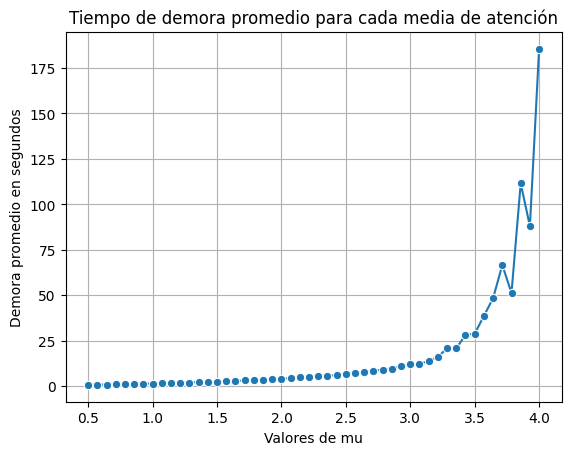

In [16]:
sns.lineplot(x=medias_db, y=demoras, marker='o')
plt.grid()
plt.title('Tiempo de demora promedio para cada media de atención')
plt.ylabel('Demora promedio en segundos')
plt.xlabel('Valores de mu')
plt.show()

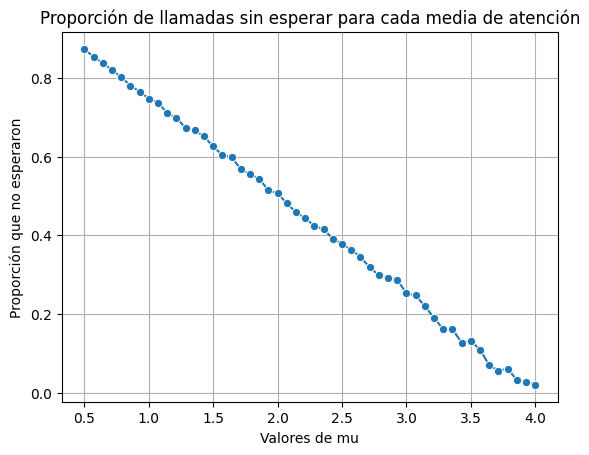

In [17]:
sns.lineplot(x=medias_db, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de atención')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu')
plt.show()